1. 데이터 수집

In [20]:
#구글 드라이브 불러오기
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [1]:
#데이터 분석에 필요한 모듈 불러오기

import nltk
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [23]:
#리뷰 딕셔너리
review_dict ={
    5: [
        "미리 예약하고 방문해야하는 곳 사장님의 자부심과 친정함에 점수를 드릴 수 있는 곳 맛음 물론 짱!!! 오래간만에 말끔히 비웠다. :)",
        "음식 하나하나에 프라이드와 정성이 느껴집니다",
        "요리와 다양색의 나라의 요리 접할수 있읍니다 미리 예약하셔야 합니다 예약은 하루전에 하시면 다양한요리도 예약 가능",
        "젊은 사람들이 좋아할 음식이네요",
        "완전 좋아요"
    ],
    4: [
        "이렇게 좋은 곳을 이제 알았네요.",
        "맛있었어요 셰프님이 섬세하십니다 송도사 최시림 김돈",
        "쉐프의 요리 솜씨가 좋으네요.",
        "식사하고 이야기하기 좋은 곳. 스테이크 크림파스타도 맛있었어요."
    ],
    3: [
        "인테리어도 예쁘고 깔끔하다",
        "한번 가볼만 합니다."
    ]
}

# 딕셔너리 데이터를 DataFrame으로 변환
df = pd.DataFrame(
    [(rating, review) for rating, reviews in review_dict.items() for review in reviews],
    columns=['Rating', 'Review']
)

# DataFrame 시각화
df.to_csv('expanded_review_data.csv', index=False, encoding='utf-8-sig')

df

,Rating,Review
0,5,미리 예약하고 방문해야하는 곳 사장님의 자부심과 친정함에 점수를 드릴 수 있는 곳 ...
1,5,음식 하나하나에 프라이드와 정성이 느껴집니다
2,5,요리와 다양색의 나라의 요리 접할수 있읍니다 미리 예약하셔야 합니다 예약은 하루전에...
3,5,젊은 사람들이 좋아할 음식이네요
4,5,완전 좋아요
5,4,이렇게 좋은 곳을 이제 알았네요.
6,4,맛있었어요 셰프님이 섬세하십니다 송도사 최시림 김돈
7,4,쉐프의 요리 솜씨가 좋으네요.
8,4,식사하고 이야기하기 좋은 곳. 스테이크 크림파스타도 맛있었어요.
9,3,인테리어도 예쁘고 깔끔하다


데이터 분석

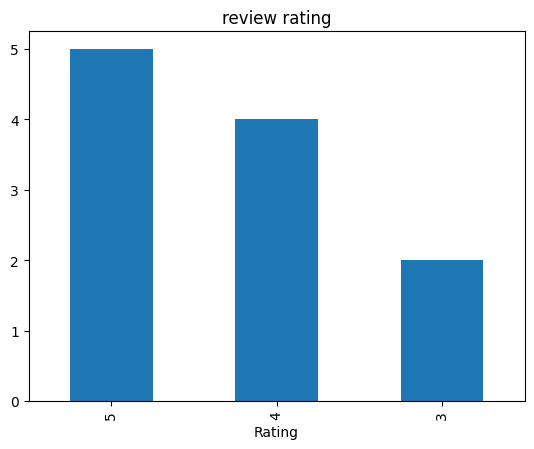

In [15]:
df['Rating'].value_counts().plot(kind='bar')
plt.title('review rating')
plt.show()

In [4]:
#nltk 다운로드
nltk.download('punkt_tab')

# 리뷰 데이터를 하나의 리스트로 합치기
all_reviews = [review for reviews in review_dict.values() for review in reviews]

# 모든 리뷰 텍스트를 하나로 병합 후 토큰화
all_reviews_text = " ".join(all_reviews)
tokens = word_tokenize(all_reviews_text)  # 단어 단위로 토큰화

# 단어 빈도 분석
word_counts = Counter(tokens)

# 상위 10개 단어 표시
most_common_words = word_counts.most_common(10)

# 상위 10개 단어를 데이터프레임으로 변환
common_words_df = pd.DataFrame(most_common_words, columns=["Word", "Frequency"])

print(common_words_df)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


     Word  Frequency
0       .          6
1       곳          3
2       !          3
3      미리          2
4      요리          2
5     합니다          2
6      좋은          2
7   맛있었어요          2
8    예약하고          1
9  방문해야하는          1


In [7]:
# 한글 워드클라우드를 생성하기 위한 폰트 다운로드
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (46.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123630 files and direc

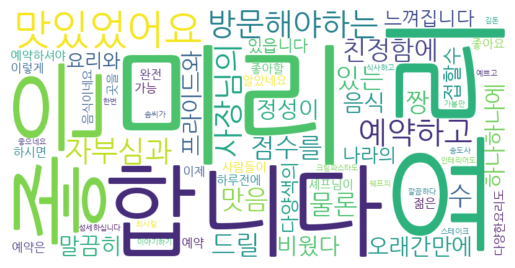

In [17]:
#리뷰 워드클라우드 생성

# 불용어 정의
custom_stopwords = [".", "!", "곳"]

# 불용어 제거 및 워드 클라우드 생성
filtered_tokens = [word for word in tokens if word not in custom_stopwords]
filtered_text = " ".join(filtered_tokens)

# 워드 클라우드 생성
wordcloud = WordCloud(font_path='/usr/share/fonts/turetype/nanum/NanumGothic.ttf', width=800, height=400, background_color="white").generate(filtered_text)

# 워드 클라우드 시각화
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

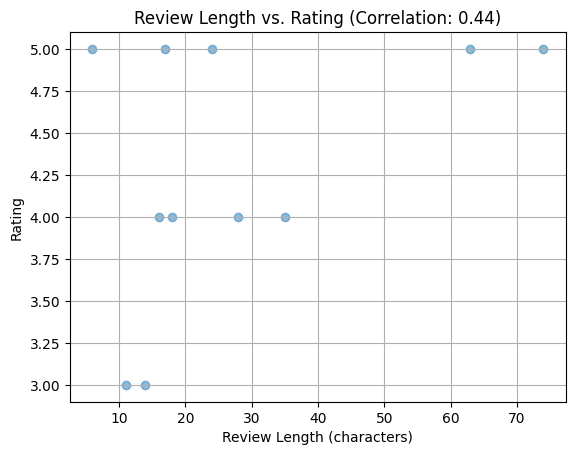

(0.4413444945360975, 0.1741802007298187)

In [24]:

from scipy.stats import pearsonr

# 리뷰 길이(문자 수) 계산
df['Review_Length'] = df['Review'].apply(len)

# 리뷰 길이와 별점 간 상관계수 계산
correlation, p_value = pearsonr(df['Review_Length'], df['Rating'])

# 상관관계 시각화
plt.scatter(df['Review_Length'], df['Rating'], alpha=0.5)
plt.title(f"Review Length vs. Rating (Correlation: {correlation:.2f})")
plt.xlabel("Review Length (characters)")
plt.ylabel("Rating")
plt.grid(True)
plt.show()

correlation, p_value  # 상관계수 및 p-value 출력


결론: 리뷰 중 5점짜리 리뷰가 가장 많은데, 그 리뷰 중 '좋은', '미리', '요리'가 들어갈 수록 리뷰가 좋은 경향이 있다.